# Assignment 2 - Basic Machine Learning to predict Pokémon battles results

([From Wikipedia](https://en.wikipedia.org/wiki/Pok%C3%A9mon)) *Pokémon is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1996,[4] and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.*

In this assignment we present you a dataset with the results of several Pokémon battles.

Your objective will be to produce a ML model that can predict the outcomes of any Pokémon battle.

At first, in this notebook, you will apply some of the basic ML approaches that we have seen in class. At this point you can also work with the *small* versions of the dataset if you want.

Later, on the `pokemon-competition.ipynb` notebook, you will train a model using all the data that will be used to predict *real* Pokémon battles.

**Dataset Description**

Within the `datasets.zip` file that you can download from the virtual campus, you will find the following datasets:

- data.train -> Full data available to train the models
- data_inverse.train -> Same data as data.train but each combat is seen from the other player's perspective (i.e. pokemon1 becomes pokemon2 and viceversa)
- small.train -> Subsample of data.train to allow fast prototyping
- small_inverse.train -> Subsample of data_inverse.train to allow fast prototyping
- data.hidden -> Dataset with no label available
- data_inverse.hidden -> Same as data.hidden but the pokemons are inverted

The datasets *.hidden are the ones used to get the tournament score,
so the true label is unknown. All the other datasets are available to
you to use however you want.

*Gotta Train 'Em All!*

In [19]:
from pathlib import Path
import pandas

__wd__ = Path("__file__").resolve().parent

import pandas as pd

datasets_path = __wd__ / "datasets"

data = pandas.read_csv(datasets_path / "data.train", index_col=0)
inverse_data = pandas.read_csv(datasets_path / "data_inverse.train", index_col=0)

def get_Xy(dataset):
    return dataset.drop("Wins", axis=1), dataset["Wins"]

X, y = get_Xy(data)

In [20]:
# Add your imports here
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Analyze the dataset (2 points)
The first step of any ML process is to know the data we are dealing with. In this part, you have to analyze the dataset and answer the questions below.

1. Which features are categorical? Which are continuous?

In [14]:
# First we can see all the features and each type.
print(data.dtypes)

# Then we can filter categorical and continuous features.
categorical_features = data.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
continuous_features = data.select_dtypes(include=['float64']).columns.tolist()

# List of each type of features.
print("Categorical Features:", categorical_features)
print("Continuous Features:", continuous_features)

Name                  object
Type 1                object
Type 2                object
HP                   float64
Attack               float64
Defense              float64
Sp. Atk              float64
Sp. Def              float64
Speed                float64
Generation           float64
Legendary             object
Name__other           object
Type 1__other         object
Type 2__other         object
HP__other            float64
Attack__other        float64
Defense__other       float64
Sp. Atk__other       float64
Sp. Def__other       float64
Speed__other         float64
Generation__other    float64
Legendary__other      object
Wins                    bool
dtype: object
Categorical Features: ['Name', 'Type 1', 'Type 2', 'Legendary', 'Name__other', 'Type 1__other', 'Type 2__other', 'Legendary__other', 'Wins']
Continuous Features: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'HP__other', 'Attack__other', 'Defense__other', 'Sp. Atk__other', 'Sp. Def__other', 

2. Observe the distribution of the "Type 1" variable. Use a plot to show this distribution.

39087   NaN
30893   NaN
45278   NaN
16398   NaN
13653   NaN
         ..
11284   NaN
44732   NaN
38158   NaN
860     NaN
15795   NaN
Name: Type 1, Length: 40000, dtype: float64


<Figure size 800x500 with 0 Axes>

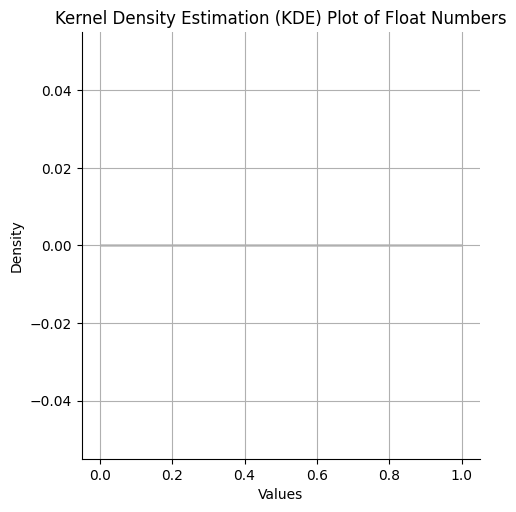

In [26]:
print(data['Type 1'])

data['Type 1'] = pd.to_numeric(data['Type 1'], errors='coerce')
# Plotting the KDE Plot
plt.figure(figsize=(8, 5))
sns.displot(data['Type 1'])
plt.title('Kernel Density Estimation (KDE) Plot of Float Numbers')
plt.xlabel('Values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

3. Determine which of the features have missing values. How many missing values there are for each one?

In [13]:
# Find columns with missing values and their respective counts
missing_values = data.isnull().sum()

# Filter columns/features with missing values (non-zero counts)
features_with_missing_values = missing_values[missing_values > 0]

print("Features with missing values:")
print(features_with_missing_values)

Features with missing values:
Name                  3994
Type 1                3974
Type 2               20535
HP                    4006
Attack                3897
Defense               4034
Sp. Atk               3920
Sp. Def               3982
Speed                 3972
Generation            3993
Legendary             3981
Name__other           3963
Type 1__other         4010
Type 2__other        20594
HP__other             4105
Attack__other         3995
Defense__other        4016
Sp. Atk__other        4096
Sp. Def__other        4005
Speed__other          4044
Generation__other     3986
Legendary__other      3982
dtype: int64


4. Analize the distribution of the target column. Is it balanced?

In [10]:
# Your code here...

## Part 2 - Preprocess the data (3 points)
Once we know how the dataset is, we can proceed with the cleaning of the data. This includes:

- Select the features that you want to use (p.e. removing too specific features). Explain why each feature is used or discarded.
- Impute the missing values. Explain why you use this imputer and not another one. If you use different imputers for different features, explain the reason why you do this.
- Encode the values of the features to work with the model you choose. This can be either encoding the categorical values, or discretizing continuous values.

In [5]:
# Your code here...

## Part 3 - Training your model (3 points)
In this part you have to train a **classifier** model to predict if a Pokemon will win or not a battle against another Pokemon. For this, you should explore at least 3 different classifiers.

You have to train and evaluate those classifiers using cross-validation in order to select the best one. Then, you should also study the results of the model (overfit, underfit, possible bias...).

1. Train (at least) 3 different classifiers
2. Evaluate the 3 classifiers using cross-validation. Select the best model according to this metric.
3. For the selected model: 
   1. Get the accuracy for data not seen during the training process
   2. Plot the confusion matrix
   3. Analize the results of accuracy and the confusion matrix

In [6]:
# Your code here...

## Part 4 (Optional) - Create an ensemble and configure the model

You have trained different classifiers but selected only one of them as "the best" one. Maybe instead of having the models competing between them, having them to colaborate would yield better results. 

We propose you to create an ensemble of the different classifiers explored in *Part 3*. You should compare the ensemble with the individual models using cross-validation, and then get the final accuracy and the confusion matrix for the ensemble.
As a bonus, try to tune the parameters of this ensemble using either `GridSearchCV` or `RandomizedSearchCV`.

1. Train an ensemble with the classifiers in *Part 3*.
2. Compare the performance of this ensemble using cross-validation, the final accuracy, and the confusion matrix. Analyze the results.
3. Fine-tune the hyper-parameters of the ensemble using `GridSearchCV` or `RandomizedSearchCV`.

In [ ]:
# Your code here...

## Part 5 - Wrap-up (2 points)
The final part of this assignment is to wrap-up your classifier into a pipeline. This pipeline will execute the entire process:

- Preprocess the data
    - Select features
    - Impute data
    - Encode values
- The classifier selected in *Part 3* (or the ensemble if it is better)

This pipeline will be used in the other provided notebook to generate the predictions for the combats you have to submit.

To ensure everything works as expected, we recommend you to load the dataset again before using it with the pipeline. You should also compare the accuracy and the confusion matrix from the pipeline with the model trained before. **Remember to set the random state to all the required transformers and estimators to have a constant output**.

In [7]:
# Your code here...